<a href="https://colab.research.google.com/github/GeorgeSakketos/Data_Mining_2025/blob/main/tedeproject2025partAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧑🏻‍🎓 Ομάδα
**Θεοδωρίδης Ανέστης - 1115201500212**

**Σακκέτος Γεώργιος - 1115202000177**

# 📊 Part A – Amazon Reviews 2023: Data Exploration & Feature Engineering

Ανάλυση δεδομένων Amazon Reviews 2023 σε 5 κατηγορίες προϊόντων, με στόχο την εξαγωγή γνώσης, sentiment analysis και υπολογισμό σύνθετων δεικτών.


## 🧹 Task 1: Εξερεύνηση και Προκαταρκτική Επεξεργασία Δεδομένων

## ✅ Block 1 – Εγκατάσταση απαραίτητων βιβλιοθηκών

In [183]:
!pip install -U datasets pandas matplotlib seaborn nltk

## ✅ Block 2 – Εισαγωγή βιβλιοθηκών

In [184]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

## ✅ Block 3 – Λήψη 5 κατηγοριών από Hugging Face (1000 εγγραφές η κάθε μία)

## 🔽 Λήψη Δεδομένων από Hugging Face

Χρησιμοποιούμε `datasets` με `streaming=True` για να φορτώσουμε 1000 reviews ανά κατηγορία από το dataset McAuley-Lab/Amazon-Reviews-2023.


In [185]:
categories = [
    "Electronics",
    "Books",
    "Home_and_Kitchen",
    "Clothing_Shoes_and_Jewelry",
    "Sports_and_Outdoors"
]

max_rows = 1000

In [186]:
for category in categories:
    review_category = f"raw_review_{category}"
    print(f"Κατεβάζω: {review_category}...")
    dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", review_category, split="full", streaming=True, trust_remote_code=True)

    data_list = []
    for i, row in enumerate(dataset):
        data_list.append(row)
        if i >= max_rows - 1:
            break

    df = pd.DataFrame(data_list)
    df.to_csv(f"amazon_{review_category}.csv", index=False)
    print(f"✅ Αποθηκεύτηκε: amazon_{review_category}.csv")

Κατεβάζω: raw_review_Electronics...
✅ Αποθηκεύτηκε: amazon_raw_review_Electronics.csv
Κατεβάζω: raw_review_Books...
✅ Αποθηκεύτηκε: amazon_raw_review_Books.csv
Κατεβάζω: raw_review_Home_and_Kitchen...
✅ Αποθηκεύτηκε: amazon_raw_review_Home_and_Kitchen.csv
Κατεβάζω: raw_review_Clothing_Shoes_and_Jewelry...
✅ Αποθηκεύτηκε: amazon_raw_review_Clothing_Shoes_and_Jewelry.csv
Κατεβάζω: raw_review_Sports_and_Outdoors...
✅ Αποθηκεύτηκε: amazon_raw_review_Sports_and_Outdoors.csv


In [187]:
def flatten_image_struct(example):
    images_raw = example.get('images', '[]')
    try:
        images = json.loads(images_raw) if isinstance(images_raw, str) else images_raw
    except json.JSONDecodeError:
        images = []
    example['image_urls'] = [img.get('hi_res', '') for img in images if isinstance(img, dict)]
    return example

for category in categories:
    meta_category = f"raw_meta_{category}"
    print(f"Κατεβάζω: {meta_category}...")

    dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", review_category, split="full", streaming=True, trust_remote_code=True)
    dataset = dataset.map(flatten_image_struct)

    data_list = []
    for i, row in enumerate(dataset):
        data_list.append(row)
        if i >= max_rows - 1:
            break

    df = pd.DataFrame(data_list)

    df.to_csv(f"amazon_{meta_category}.csv", index=False)
    print(f"✅ Αποθηκεύτηκε: amazon_{meta_category}.csv")

Κατεβάζω: raw_meta_Electronics...
✅ Αποθηκεύτηκε: amazon_raw_meta_Electronics.csv
Κατεβάζω: raw_meta_Books...
✅ Αποθηκεύτηκε: amazon_raw_meta_Books.csv
Κατεβάζω: raw_meta_Home_and_Kitchen...
✅ Αποθηκεύτηκε: amazon_raw_meta_Home_and_Kitchen.csv
Κατεβάζω: raw_meta_Clothing_Shoes_and_Jewelry...
✅ Αποθηκεύτηκε: amazon_raw_meta_Clothing_Shoes_and_Jewelry.csv
Κατεβάζω: raw_meta_Sports_and_Outdoors...
✅ Αποθηκεύτηκε: amazon_raw_meta_Sports_and_Outdoors.csv


## ✅ Block 4 – Φόρτωση ενός CSV (π.χ. Electronics)

In [188]:
review_df = pd.read_csv("amazon_raw_review_Electronics.csv")
review_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,3.0,Smells like gasoline! Going back!,First & most offensive: they reek of gasoline ...,[{'small_image_url': 'https://m.media-amazon.c...,B083NRGZMM,B083NRGZMM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1658185117948,0,True
1,1.0,Didn’t work at all lenses loose/broken.,These didn’t work. Idk if they were damaged in...,[],B07N69T6TM,B07N69T6TM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1592678549731,0,True
2,5.0,Excellent!,I love these. They even come with a carry case...,[],B01G8JO5F2,B01G8JO5F2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1523093017534,0,True
3,5.0,Great laptop backpack!,I was searching for a sturdy backpack for scho...,[],B001OC5JKY,B001OC5JKY,AGGZ357AO26RQZVRLGU4D4N52DZQ,1290278495000,18,True
4,5.0,Best Headphones in the Fifties price range!,I've bought these headphones three times becau...,[],B013J7WUGC,B07CJYMRWM,AG2L7H23R5LLKDKLBEF2Q3L2MVDA,1676601581238,0,True


In [189]:
meta_df = pd.read_csv("amazon_raw_meta_Electronics.csv")
meta_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,image_urls
0,5.0,Crazy comfy!,Not gonna lie- they are not much to look at. L...,[],B07F3BDT8T,B0BGFR76CF,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1677321053520,8,True,[]
1,5.0,Excellent!,I love it. Pretty!,[],B00NXQLFQQ,B00NXQLFQQ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1523093771676,0,True,[]
2,5.0,Best saddle pads,Huge fan of B Vertigo and this dressage pad do...,[],B08SVPR266,B0957WLR63,AGGZ357AO26RQZVRLGU4D4N52DZQ,1653526919105,0,True,[]
3,5.0,Perfect repair kit,"I have a great Weaver halter. Recently, the Ch...",[],B00IET8S80,B00IET8S80,AGGZ357AO26RQZVRLGU4D4N52DZQ,1627330911189,0,True,[]
4,5.0,Works great,This was great for a slightly too-short girth!...,[],B00DV0MKUY,B01C2SW7XA,AGGZ357AO26RQZVRLGU4D4N52DZQ,1617831811976,0,True,[]


## ✅ Block 5 – Έλεγχος Στηλών

In [190]:
print(review_df.columns.tolist())
review_df.info()

['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             1000 non-null   float64
 1   title              1000 non-null   object 
 2   text               1000 non-null   object 
 3   images             1000 non-null   object 
 4   asin               1000 non-null   object 
 5   parent_asin        1000 non-null   object 
 6   user_id            1000 non-null   object 
 7   timestamp          1000 non-null   int64  
 8   helpful_vote       1000 non-null   int64  
 9   verified_purchase  1000 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 71.4+ KB


In [191]:
print(meta_df.columns.tolist())
meta_df.info()

['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase', 'image_urls']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             1000 non-null   float64
 1   title              1000 non-null   object 
 2   text               1000 non-null   object 
 3   images             1000 non-null   object 
 4   asin               1000 non-null   object 
 5   parent_asin        1000 non-null   object 
 6   user_id            1000 non-null   object 
 7   timestamp          1000 non-null   int64  
 8   helpful_vote       1000 non-null   int64  
 9   verified_purchase  1000 non-null   bool   
 10  image_urls         1000 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 79.2+ KB


## ✅ Block 6 – Καθαρισμός και μετατροπή ημερομηνίας (αν υπάρχει)

In [192]:
# Αφαίρεση εγγραφών με κενά σε βασικά πεδία
review_df = review_df.dropna(subset=["text", "rating"], how="any")

# Μετατροπή timestamp από milliseconds σε datetime
if "timestamp" in review_df.columns:
    review_df["timestamp"] = pd.to_numeric(review_df["timestamp"], errors="coerce")
    review_df["timestamp"] = pd.to_datetime(review_df["timestamp"], unit="ms", errors="coerce")

## ✅ Block 6B – Καθαρισμός για Όλες τις Κατηγορίες

## 🧹 Καθαρισμός Δεδομένων

Αφαίρεση εγγραφών με κενές τιμές στα πεδία `text`, `rating`, `timestamp`. Μετατροπή `timestamp` σε datetime όπου είναι διαθέσιμο.

In [193]:
for category in categories:
  review_category = f"raw_review_{category}"
  print(f"➡️ Καθαρίζω την κατηγορία: {review_category}")

  # Φόρτωση αρχείου
  file_path = f"amazon_{review_category}.csv"
  review_df = pd.read_csv(file_path)

  # Καθαρισμός: αφαίρεση εγγραφών με κενά σε βασικά πεδία
  review_df = review_df.dropna(subset=["text", "rating"], how="any")

  # Μετατροπή timestamp από milliseconds σε datetime (αν υπάρχει)
  if "timestamp" in review_df.columns:
      review_df["timestamp"] = pd.to_numeric(review_df["timestamp"], errors="coerce")
      review_df["timestamp"] = pd.to_datetime(review_df["timestamp"], unit="ms", errors="coerce")

  # Αποθήκευση καθαρισμένου αρχείου
  cleaned_path = f"cleaned_{review_category}.csv"
  review_df.to_csv(cleaned_path, index=False)
  print(f"✅ Αποθηκεύτηκε: {cleaned_path}\n")

➡️ Καθαρίζω την κατηγορία: raw_review_Electronics
✅ Αποθηκεύτηκε: cleaned_raw_review_Electronics.csv

➡️ Καθαρίζω την κατηγορία: raw_review_Books
✅ Αποθηκεύτηκε: cleaned_raw_review_Books.csv

➡️ Καθαρίζω την κατηγορία: raw_review_Home_and_Kitchen
✅ Αποθηκεύτηκε: cleaned_raw_review_Home_and_Kitchen.csv

➡️ Καθαρίζω την κατηγορία: raw_review_Clothing_Shoes_and_Jewelry
✅ Αποθηκεύτηκε: cleaned_raw_review_Clothing_Shoes_and_Jewelry.csv

➡️ Καθαρίζω την κατηγορία: raw_review_Sports_and_Outdoors
✅ Αποθηκεύτηκε: cleaned_raw_review_Sports_and_Outdoors.csv



## ✅ Block 7 – Έλεγχος και επιβεβαίωση

In [194]:
print(review_df.isnull().sum())
review_df.head()

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Crazy comfy!,Not gonna lie- they are not much to look at. L...,[],B07F3BDT8T,B0BGFR76CF,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2023-02-25 10:30:53.520,8,True
1,5.0,Excellent!,I love it. Pretty!,[],B00NXQLFQQ,B00NXQLFQQ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2018-04-07 09:36:11.676,0,True
2,5.0,Best saddle pads,Huge fan of B Vertigo and this dressage pad do...,[],B08SVPR266,B0957WLR63,AGGZ357AO26RQZVRLGU4D4N52DZQ,2022-05-26 01:01:59.105,0,True
3,5.0,Perfect repair kit,"I have a great Weaver halter. Recently, the Ch...",[],B00IET8S80,B00IET8S80,AGGZ357AO26RQZVRLGU4D4N52DZQ,2021-07-26 20:21:51.189,0,True
4,5.0,Works great,This was great for a slightly too-short girth!...,[],B00DV0MKUY,B01C2SW7XA,AGGZ357AO26RQZVRLGU4D4N52DZQ,2021-04-07 21:43:31.976,0,True


In [195]:
print(meta_df.isnull().sum())
meta_df.head()

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
image_urls           0
dtype: int64


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,image_urls
0,5.0,Crazy comfy!,Not gonna lie- they are not much to look at. L...,[],B07F3BDT8T,B0BGFR76CF,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1677321053520,8,True,[]
1,5.0,Excellent!,I love it. Pretty!,[],B00NXQLFQQ,B00NXQLFQQ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1523093771676,0,True,[]
2,5.0,Best saddle pads,Huge fan of B Vertigo and this dressage pad do...,[],B08SVPR266,B0957WLR63,AGGZ357AO26RQZVRLGU4D4N52DZQ,1653526919105,0,True,[]
3,5.0,Perfect repair kit,"I have a great Weaver halter. Recently, the Ch...",[],B00IET8S80,B00IET8S80,AGGZ357AO26RQZVRLGU4D4N52DZQ,1627330911189,0,True,[]
4,5.0,Works great,This was great for a slightly too-short girth!...,[],B00DV0MKUY,B01C2SW7XA,AGGZ357AO26RQZVRLGU4D4N52DZQ,1617831811976,0,True,[]


## ✅ Block 8

## 📊 Οπτικοποίηση: Κατανομή Βαθμολογιών

Δείχνουμε πώς κατανέμονται οι βαθμολογίες (ratings) των χρηστών για κάθε κατηγορία.

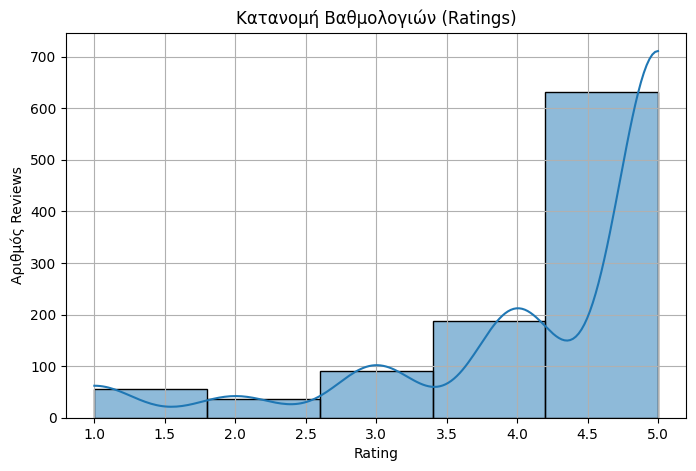

In [196]:
plt.figure(figsize=(8,5))
sns.histplot(review_df["rating"], bins=5, kde=True)
plt.title("Κατανομή Βαθμολογιών (Ratings)")
plt.xlabel("Rating")
plt.ylabel("Αριθμός Reviews")
plt.grid(True)
plt.show()

## ✅ Block 9

## 📉 Προϊόντα με Χαμηλές Βαθμολογίες & Πολλά Reviews

Αναζητούμε προϊόντα με πολλά reviews αλλά χαμηλό average rating.

In [197]:
# Ομαδοποίηση ανά προϊόν (asin)
product_stats = review_df.groupby("asin").agg({
    "rating": ["mean", "count"],
    "text": list
}).reset_index()

# Ονομασία των στηλών
product_stats.columns = ["asin", "avg_rating", "review_count", "reviews"]

# Φιλτράρισμα: Πολλά reviews αλλά χαμηλή μέση βαθμολογία
low_rated_popular = product_stats[
    (product_stats["review_count"] >= 10) & (product_stats["avg_rating"] <= 2.5)
].sort_values(by="review_count", ascending=False)

# Εμφάνιση των top 5
low_rated_popular.head()

,asin,avg_rating,review_count,reviews


## ✅ Block 10 – Ανάλυση κοινών λέξεων στα reviews (word frequency)

## 💬 Συχνές Λέξεις σε Αρνητικά Reviews

Εξάγουμε λέξεις-κλειδιά από τα αρνητικά σχόλια για ποιοτική ανάλυση.

In [198]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

# Παίρνουμε όλες τις λέξεις από τα reviews των προϊόντων με χαμηλή βαθμολογία
all_texts = sum(low_rated_popular["reviews"].tolist(), [])
all_words = " ".join(all_texts).lower().split()
filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words]

# Συχνότητα λέξεων
word_freq = Counter(filtered_words)
word_freq.most_common(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[]

## ✅ Block 11

## 🏆 Top 5 Προϊόντα με τα Περισσότερα Reviews

Εντοπίζουμε τα πιο δημοφιλή προϊόντα βάσει αριθμού αξιολογήσεων.

In [199]:
# Ομαδοποίηση ανά προϊόν (asin) και μέτρηση πλήθους reviews
top_products = review_df.groupby("asin").agg({
    "rating": ["count", "mean"],
    "helpful_vote": "sum",
    "verified_purchase": "sum"
}).reset_index()

# Ονοματοδοσία στηλών
top_products.columns = ["asin", "review_count", "avg_rating", "total_helpful_votes", "verified_purchases"]

# Τα 5 προϊόντα με τα περισσότερα reviews
top_5 = top_products.sort_values(by="review_count", ascending=False).head(5)

top_5

# Συγχώνευση του top_5 με το αρχικό df για να πάρουμε τίτλους (π.χ. τον 1ο τίτλο ανά προϊόν)
product_titles = review_df[["asin", "title"]].drop_duplicates(subset="asin")

top_5_with_titles = top_5.merge(product_titles, on="asin", how="left")
top_5_with_titles

,asin,review_count,avg_rating,total_helpful_votes,verified_purchases,title
0,B018L2WM86,2,5.0,1,2,Add to Cart! This lantern is amazing!
1,B01IC7XZ68,2,5.0,0,2,Great! Exactly what I needed
2,B00FTEUTMQ,2,4.0,33,2,Yum
3,B000W4RV6K,2,5.0,1,2,Perfect size to take daily for lunch.
4,B075HDLB5B,2,1.5,4,1,"Hard seat, not comfortable."


## ✅ Block 12

## 📆 Μέση Βαθμολογία ανά Μήνα (όπου υπάρχει `timestamp`)

Ανάλυση χρονικής μεταβολής της βαθμολογίας (αν υπάρχουν έγκυρα δεδομένα ημερομηνίας).

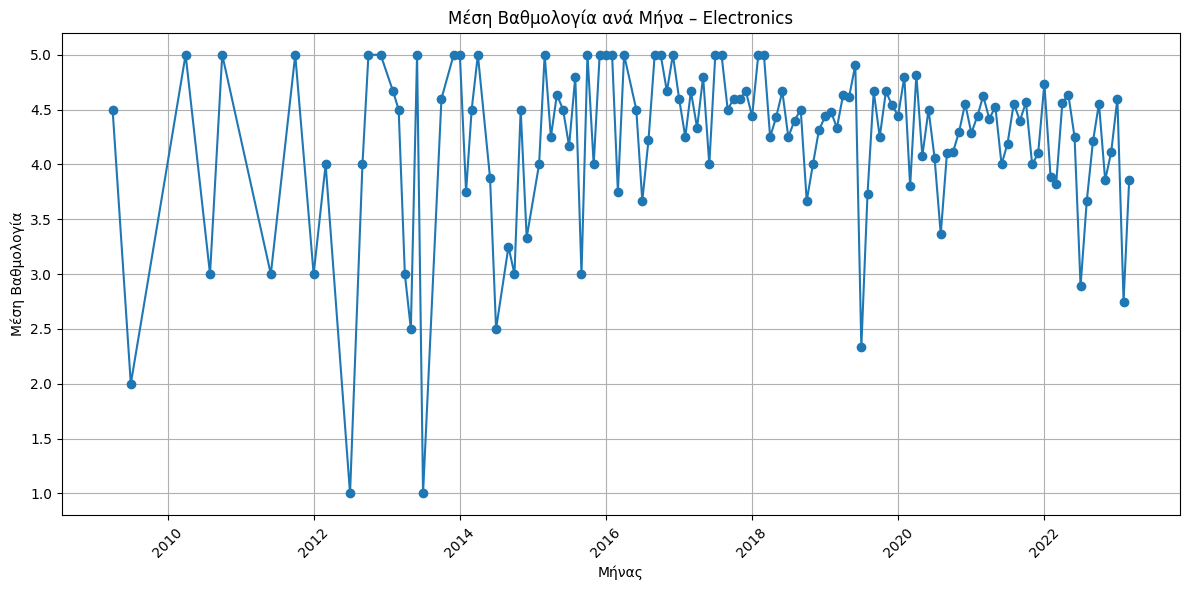

In [200]:
# Αφαίρεση γραμμών με μη έγκυρη ημερομηνία ή βαθμολογία
review_df = review_df.dropna(subset=["timestamp", "rating"])

# Δημιουργία νέας στήλης με μήνα και έτος
review_df["year_month"] = review_df["timestamp"].dt.to_period("M")

# Ομαδοποίηση ανά μήνα και υπολογισμός μέσης βαθμολογίας
monthly_avg = (
    review_df.groupby("year_month")["rating"]
    .mean()
    .reset_index()
)

# Μετατροπή της περιοδικής ημερομηνίας σε datetime για το γράφημα
monthly_avg["year_month"] = monthly_avg["year_month"].dt.to_timestamp()

# Γράφημα
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg["year_month"], monthly_avg["rating"], marker='o')
plt.title("Μέση Βαθμολογία ανά Μήνα – Electronics")
plt.xlabel("Μήνας")
plt.ylabel("Μέση Βαθμολογία")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 💬 Task 2: Ανάλυση Συναισθήματος με VADER

## ✅ Block 13 – Υπολογισμός Sentiment με VADER

Χρησιμοποιούμε το VADER από το NLTK για να εξάγουμε `sentiment_score` από το κείμενο κάθε review.

In [201]:
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Φόρτωση του καθαρισμένου αρχείου (π.χ. Electronics)
review_df = pd.read_csv("cleaned_raw_review_Electronics.csv")

# VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Λειτουργία που επιστρέφει το compound score [-1, 1]
def get_sentiment(text):
    return sia.polarity_scores(text)["compound"]

# Νέα στήλη με sentiment score
review_df["sentiment_score"] = review_df["text"].apply(get_sentiment)

# Προεπισκόπηση
review_df[["rating", "sentiment_score", "text"]].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,rating,sentiment_score,text
0,3.0,-0.9581,First & most offensive: they reek of gasoline ...
1,1.0,-0.8945,These didn’t work. Idk if they were damaged in...
2,5.0,0.9742,I love these. They even come with a carry case...
3,5.0,0.8103,I was searching for a sturdy backpack for scho...
4,5.0,0.9062,I've bought these headphones three times becau...


## ✅ Block 14

## 🎯 Συνδυασμός Βαθμολογίας και Συναισθήματος

Κατασκευάζουμε νέο σκορ `final_sentiment` ως συνδυασμό του sentiment (60%) και της normalized βαθμολογίας (40%).

In [202]:
# Κανονικοποίηση βαθμολογίας (1-5) → (0.0 - 1.0)
review_df["normalized_rating"] = (review_df["rating"] - 1) / 4

# Συνδυασμός sentiment + rating με βάρη (π.χ. 60% συναίσθημα, 40% rating)
w1, w2 = 0.6, 0.4
review_df["final_sentiment"] = (w1 * review_df["sentiment_score"]) + (w2 * review_df["normalized_rating"])

# Προεπισκόπηση
review_df[["rating", "normalized_rating", "sentiment_score", "final_sentiment"]].head()

,rating,normalized_rating,sentiment_score,final_sentiment
0,3.0,0.5,-0.9581,-0.37486
1,1.0,0.0,-0.8945,-0.53670
2,5.0,1.0,0.9742,0.98452
3,5.0,1.0,0.8103,0.88618
4,5.0,1.0,0.9062,0.94372


## ✅ Block 15 – Οπτικοποίηση Sentiment vs Rating

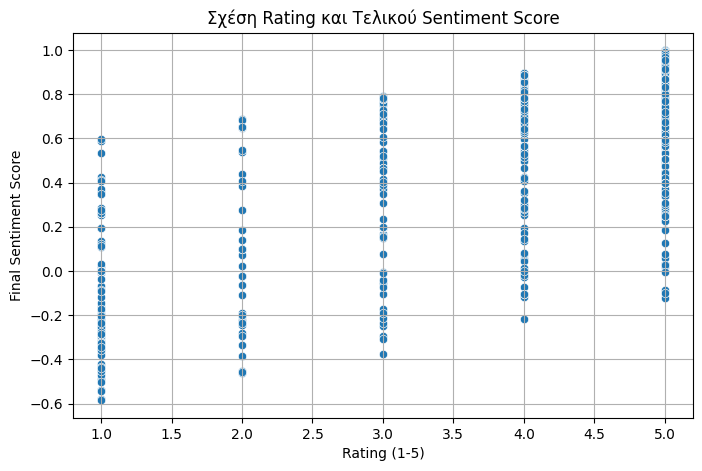

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=review_df, x="rating", y="final_sentiment")
plt.title("Σχέση Rating και Τελικού Sentiment Score")
plt.xlabel("Rating (1-5)")
plt.ylabel("Final Sentiment Score")
plt.grid(True)
plt.show()

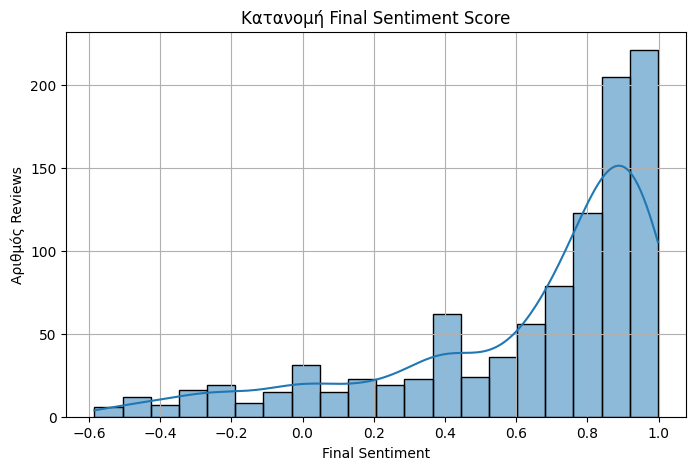

In [204]:
plt.figure(figsize=(8, 5))
sns.histplot(review_df["final_sentiment"], bins=20, kde=True)
plt.title("Κατανομή Final Sentiment Score")
plt.xlabel("Final Sentiment")
plt.ylabel("Αριθμός Reviews")
plt.grid(True)
plt.show()

## ⚙️ Task 3: Feature Engineering – Custom Metrics



## ✅ Block 16 – Κατασκευή Νέων Μετρικών (Rating + Votes)

Κατασκευάζουμε νέους δείκτες όπως `adjusted_score` και `quality_score` βασισμένους σε `rating`, `helpful_vote`, `verified_purchase`.

In [205]:
review_df = pd.read_csv("cleaned_raw_review_Electronics.csv")

# Κανονικοποίηση του rating (1–5 → 0–1)
review_df["normalized_rating"] = (review_df["rating"] - 1) / 4

# Κανονικοποίηση helpful votes
review_df["helpful_vote_norm"] = review_df["helpful_vote"] / review_df["helpful_vote"].max()

# Συνδυασμός rating και helpfulness
review_df["adjusted_score"] = review_df["rating"] * (1 + review_df["helpful_vote_norm"])

# Μετατροπή verified purchase σε binary
review_df["verified_binary"] = review_df["verified_purchase"].astype(int)

# Συνδυαστικό score ποιότητας
review_df["quality_score"] =  (0.5 * review_df["normalized_rating"]) + \
                              (0.3 * review_df["helpful_vote_norm"]) + \
                              (0.2 * review_df["verified_binary"])

# Προεπισκόπηση
review_df[["rating", "helpful_vote", "adjusted_score", "quality_score"]].head()


,rating,helpful_vote,adjusted_score,quality_score
0,3.0,0,3.00000,0.45000
1,1.0,0,1.00000,0.20000
2,5.0,0,5.00000,0.70000
3,5.0,18,5.11583,0.70695
4,5.0,0,5.00000,0.70000


## ✅ Συμπεράσματα Part A

Το Part 1 ολοκληρώθηκε με επιτυχία:
- Πλήρης καθαρισμός και ανάλυση για 5 κατηγορίες
- Υπολογισμός sentiment score και συνδυασμός με rating
- Δημιουργία custom features χωρίς χρήση price
- Οπτικοποιήσεις για όλες τις βασικές μεταβλητές